In [4]:
import numpy as np

path = "/home/t-isazawat/kblam_attention/acc_results/accuracy_results_acc.npy"
acc = np.load(path)

In [5]:
acc

array([[0.  , 0.06],
       [0.04, 0.08],
       [0.02, 0.06],
       [0.02, 0.06],
       [0.02, 0.08],
       [0.5 , 0.62],
       [0.02, 0.06],
       [0.02, 0.08],
       [0.02, 0.06],
       [0.02, 0.06],
       [0.02, 0.06]])

Counter({69: 14, 77: 12, 50: 10, 6: 5, 57: 4, 5: 3, 93: 3, 8: 2, 17: 2, 25: 2, 41: 2, 43: 2, 48: 2, 72: 2, 73: 2, 98: 2, 0: 1, 9: 1, 19: 1, 22: 1, 23: 1, 29: 1, 30: 1, 31: 1, 36: 1, 37: 1, 38: 1, 39: 1, 45: 1, 51: 1, 53: 1, 55: 1, 58: 1, 59: 1, 60: 1, 62: 1, 63: 1, 68: 1, 70: 1, 78: 1, 80: 1, 85: 1, 90: 1, 91: 1, 92: 1, 95: 1, 97: 1})


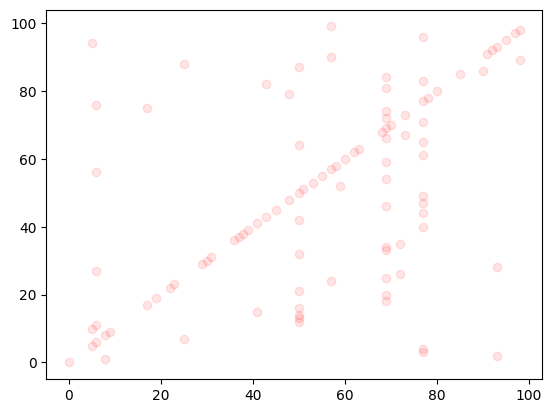

In [ ]:
import matplotlib.pyplot as plt

attention_matrix = np.load("/home/t-isazawat/kblam_attention/accuracy_results_15.npy")[..., :100].reshape(100, -1, 100).sum(1)[:100, :100]
plt.imshow(attention_matrix)

max_coord = attention_matrix.argmax(1)
plt.scatter(max_coord, [i for i in range(100)], alpha=0.1, c="red")
elements = [int(el) for el in sorted(max_coord)]

from collections import Counter
counter = Counter(elements)
print(counter)

In [49]:
originals[77]

DataPoint(name='Marathon', description_type='name change date', description='19 July 1990', Q='when did marathon change its name to snickers', A='19 July 1990', key_string='the name change date of Marathon', extended_Q=None, extended_A=None)

In [24]:
# THE FOLLOWING DOESN'T WORK AS THEY'RE RANDOMLY SHUFFLED
from kblam.utils.data_utils import DataPoint
import json

originals = [DataPoint(**el) for el in json.load(open("/home/t-isazawat/kblam_rebuttal_files/nq/nq.json", "r"))]
with open("kblam_attention/acc_results/accuracy_results_acc.txt") as f:
    llm_answers = []
    for line in f.readlines():
        llm_answers.append(line)

for original, llm_answer in zip(originals, llm_answers):
    print(llm_answer, original.A, original.name, original.description_type, original.description)

<|start_header_id|>user<|end_header_id|> when was the last time anyone was on the moon<|eot_id|><|start_header_id|>assistant<|end_header_id|>The last time anyone was on the moon was during the Apollo 17 mission in December 1972.<|eot_id|>
 14 December 1972 UTC moon landing last human presence 14 December 1972 UTC
<|start_header_id|>user<|end_header_id|> who wrote he ain't heavy he's my brother lyrics<|eot_id|><|start_header_id|>assistant<|end_header_id|>The assistant cannot be determined from the provided information.<|eot_id|>
 Bobby Scott he ain't heavy he's my brother lyrics lyricist Bobby Scott
<|start_header_id|>user<|end_header_id|> how many seasons of the bastard executioner are there<|eot_id|><|start_header_id|>assistant<|end_header_id|>The bastard executioner has three seasons.<|eot_id|>
 one The Bastard Executioner number of seasons one
<|start_header_id|>user<|end_header_id|> when did the eagles win last super bowl<|eot_id|><|start_header_id|>assistant<|end_header_id|>The Ea

In [ ]:
import numpy as np

xs = [50, 100, 200, 400, 800, 1600, 3200]
base = "/home/t-isazawat/kblam_attention/save_dir/"
# /home/t-isazawat/kblam_attention/save_dir/experiment_result_50_triples_0_trial_acc.npy
results = []
for x in xs:
    print(x)
    x_top1 = 0
    x_top5 = 0
    for trial in range(5):
        experiment_name = f"test_synthetic_scale_factor_100_{x}_triples_{trial}_trial"
        loaded_results = np.load(base + f"{experiment_name}_acc.npy")
        actual_results = loaded_results[5]
        x_top1 += actual_results[0]
        x_top5 += actual_results[1]
    x_top1 /= 5
    x_top5 /= 5
    results.append([float('%.3g' % x_top1), float('%.3g' % x_top5)])

print(results)

50
100
200
400
800
1600
3200
6400
[[0.996, 1.0], [0.988, 0.996], [0.996, 1.0], [0.988, 1.0], [0.98, 0.996], [0.988, 1.0], [0.948, 0.996], [0.936, 0.996]]


: 

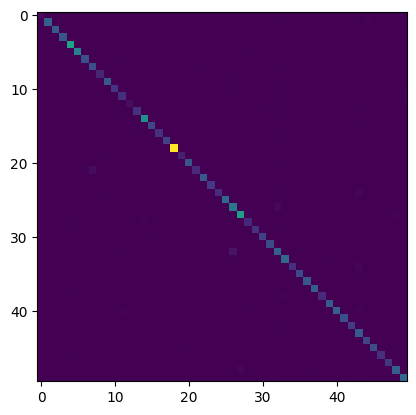

In [17]:
import matplotlib.pyplot as plt

attention_matrix = np.load("/home/t-isazawat/kblam_attention/attention/test_synthetic_scale_factor_100_6400_triples_3_trial_15.npy")[..., :6400].reshape(50, -1, 6400).sum(1)[..., :50]
plt.imshow(attention_matrix)

# max_coord = attention_matrix.argmax(1)
# plt.scatter(max_coord, [i for i in range(50)], alpha=0.1, c="red")
# elements = [int(el) for el in sorted(max_coord)]

# from collections import Counter
# counter = Counter(elements)
# print(counter)